## I. Business Understanding

# Business Problem:
- What does churn stand for?
Churn in a business setting refers to losing an acquired, potentially profitable customer. The definition of churn can vary by industry ( in Healthcare, dead people are considered churn while in finance, people with inactive cards are called churned).

- Why do businesses want to prevent churn?
Acquiring a new customer is always more expensive than retaining an existing one. Hence, not letting them churn is the key to a sustained revenue stream.

- What metrics do we optimize on while predicting churn?
F1-score and Recall are good ones, but you can also look at PR curves

The goals of this study will be:

- Analyze data from customer churn at Telcom - **metrics**
- Determine the best metrics to predict when a customer will/won't churn - **feature importance**
- Maximize Revenue per customer -  **preventing churn**
- Make Reccomendations to Telcom to prevent churn -  **Analyze the feature importance**

### Business Questions to consider:
1. What percentage of customers leave after one month? 6 months? 1 year? 72 months(6 years, which is the max)?
2. Which services have the highest impact on customer churn?
3. Can we calculate lifetime value of a customer?
4. How do we prevent senior citizens from churning?
5. What types of customers buy into long term contracts? How does that impact churn?
6. What services do customers with longer tenure have?

![churn_image.png](./images/churn_image.png)

## Importing Necessary Libraries

In [1]:
#data manipulation, imports
import pandas as pd
import numpy as np
from scipy import stats as stats
import math


#data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

# Classification algorithms
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


# data visualiztion
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, \
precision_recall_fscore_support, f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings # weird sns.distplot() warnings
warnings.filterwarnings("ignore")



plt.style.use('classic')


## Functions used for project

In [2]:
#plottin feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

## II. Data Understanding
Next is the Data Understanding phase. Adding to the foundation of Business Understanding, it drives the focus to identify, collect, and analyze the data sets that can help you accomplish the project goals. This phase also has four tasks:

1. Collect initial data: Acquire the necessary data and (if necessary) load it into your analysis tool.
2. Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.
3. Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
4. Verify data quality: How clean/dirty is the data? Document any quality issues.

## 1. Reading in Dataset
- Initial screening of the data will be checking each column in the dataset.
- Aspects to look for within the data will be datatypes. The datatypes will help determine if there is a need for say one hot encoding or any other type of data preparation.

Click to go to the dataset for more details on the column features, click [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [3]:
#Read in dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#Checking first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.

## Defining target and feature variables

- In this section the dataframe will be split into its target and feature variables. The target will be defined as the 'churn' (whether the customer will leave or not). 
- In the data exploration, general descriptive statistics like measures of central tendency (mean, median, mode) and variability (quartiles, standard deviation).


### Telcom Customer Churn
- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

- The raw data contains 7043 rows (customers) and 21 columns (features).

**The “Churn” column is our target.**

`Churn` - a measure of the number of customers or employees who leave a company during a given period.


### Checking descriptive statistics

In [4]:
#Checking Shape
df.shape

(7043, 21)

In [5]:
#checking descriptive statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In the dtypes above, we see that the total charges is listed as an object. For this we also see that there are some values that are listed as `''` which won't be able to convert to a float. For this we will change any value listed as `''` to a 0.0, then filter by all total charges above 0.0.  

In [8]:
# changing Total Charges to a float
df['TotalCharges'] = df['TotalCharges'].str.strip().apply(lambda x: 0.0 if x == '' else float(x))

In [9]:
# filtering by Total charges above 0. Reasoning is the monthly charges are listed as more than zero, therefore the\
# total charges cannot be 0.
df = df[df['TotalCharges'] > 0]
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
#checking shape after filter
df.shape

(7032, 21)

In [11]:
#lets check is there any duplicate records or not .
df['customerID'].duplicated().sum()

0

After filtering the dataset, it appears we only lost 9 customers which won't have a huge affect on the overall results.

#### Initial observarions:
- 7032 rows, 21 columns
- This means we have: 7032 customers, 20 feature variables, 1 target (churn)
- The max tenure (number of months that a customer has stayed with the company) is 72 months, with an average of 32 months. 
- It would be interesting to see the types of contracts that people are on and see how it correlates with tenure. 

In [12]:
df['total_charge_check'] = df['tenure'] * df['MonthlyCharges']
df['charge_diff'] = (df['TotalCharges'] - df['total_charge_check']).abs()
df[['tenure', 'MonthlyCharges', 'TotalCharges', 'total_charge_check', 'charge_diff']].sort_values('charge_diff', ascending=False)

,tenure,MonthlyCharges,TotalCharges,total_charge_check,charge_diff
1418,67,89.55,6373.10,5999.85,373.25
1746,72,116.45,8013.55,8384.40,370.85
6596,64,81.25,5567.55,5200.00,367.55
1274,62,101.15,6638.35,6271.30,367.05
1997,67,105.65,6717.90,7078.55,360.65
...,...,...,...,...,...
3110,1,19.10,19.10,19.10,0.00
3103,1,19.45,19.45,19.45,0.00
1654,1,18.80,18.80,18.80,0.00
1144,1,35.55,35.55,35.55,0.00


Here we see that the Monthly to total charges do not match when we check for many of the data values. This could be due to montly charges updating over time. It is not clear by the data card in kaggle that the monthly charge is or is not a flat fee, so we may run the model against both columns and see the differential in the model's performance. 

In [13]:
df = df.drop(['total_charge_check','charge_diff'], axis=1)

In [14]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Data appears to be skewed towards "No" on the Churn, which shows that the majority of customers stay with the company in this dataset. Because the data appears to be skewed towards customers who did not churn, under or oversampling may be necessary here. 

## III. Data Preparation
A common rule of thumb is that 80% of the project is data preparation.

This phase, which is often referred to as “data munging”, prepares the final data set(s) for modeling. It has five tasks:

- Select data: Determine which data sets will be used and document reasons for inclusion/exclusion.
- Clean data: Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.
- Construct data: Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.
- Integrate data: Create new data sets by combining data from multiple sources.
- Format data: Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Prep Step 1: Observe categorical data.
- In this section, we will observe the categorical data and replace it with numerical values.
- Examples that we see that are in common from the cell below are `"Yes" and "No"` from the columns for various services. 
- Here we will replace `"Yes" and "No"` with `0 and 1` to enable feeding the data into a classifier. 
- Remaining data will be dealt with likely OneHotEncoding

In [16]:
#checking the unique values of all column
for col in df.columns:
    if (df[col].dtypes=='object'):
        print (f"{col}:{df[col].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


Yes/No values will be simplified for the columns that have "No internet service" and "No" as values. If the customer does not have internet service, then they will not have any internet services...

- Here we will replace `"No internet service"` and `"No phone service"` with `"No"`. 

In [17]:
df.replace({'No internet service':'No'},inplace=True)
df.replace({'No phone service':'No'},inplace=True)

- Rechecking the unique values of all column after replacement values

In [18]:
#checking the unique values of all column after replacement values
for col in df.columns:
    if (df[col].dtypes=='object'):
        print (f"{col}:{df[col].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


### Now that the data has been formatted, the classifier will need numerical data to assign. Here, we will do a simple replacement for all the "Yes", "No" data and assign them to 1 and 0.

In [19]:
df.replace({'Yes':1},inplace=True)
df.replace({'No':0},inplace=True)

In [20]:
#checking the unique values of all column after replacement values
for col in df.columns:
    if (df[col].dtypes=='object'):
        print (f"{col}:{df[col].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 0]
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


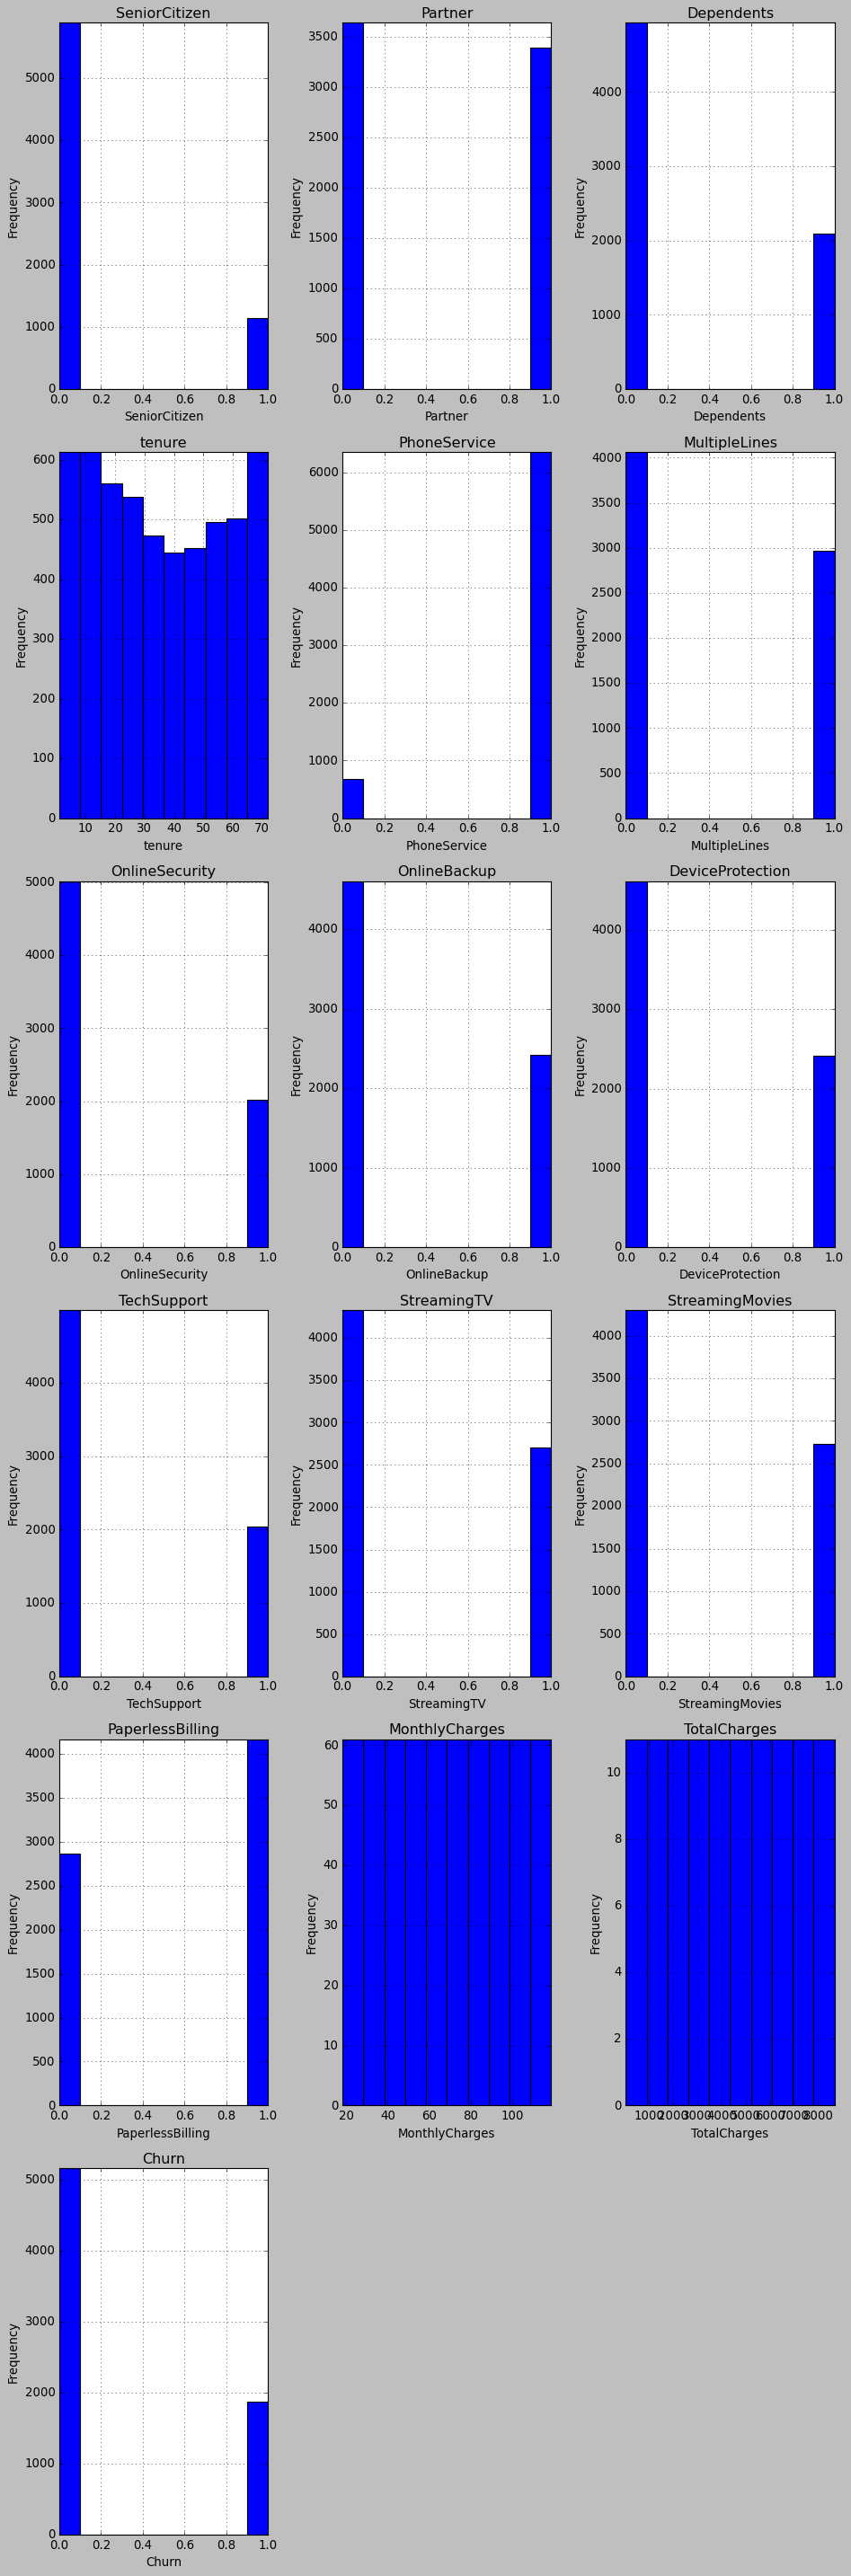

In [21]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for the grid
n_plots = len(numeric_columns)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

# Create a figure and axes using subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6 * n_rows))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each numeric column
for i, column in enumerate(numeric_columns):
    # Create a histogram on the current axes
    ax = axes[i]
    df[column].plot.hist(ax=ax)
    
    # Set labels and titles for the histogram
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.set_title(column)
    
    # Adjust the x and y axis limits
    ax.set_xlim(df[column].min(), df[column].max())
    ax.set_ylim(0, df[column].value_counts().max())
    
    # Add gridlines
    ax.grid(True)

# Remove empty subplots
if n_plots < n_rows * n_cols:
    for i in range(n_plots, n_rows * n_cols):
        fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Further exploration into the string predictors is needed to see if one hot encoding or string replacement of weighted values is necessary. 

We will begin by separating the dataframe into dtypes and observing these features.

#### The tenure variable appears to be one of the more interesting continuous metrics in this data

In [22]:
df[['tenure', 'TotalCharges','MonthlyCharges']].sort_values('tenure', ascending=False)

,tenure,TotalCharges,MonthlyCharges
2988,72,7880.25,109.65
3823,72,5763.15,78.85
3886,72,7677.40,106.85
6659,72,6719.90,92.30
6661,72,3784.00,53.65
...,...,...,...
3852,1,19.65,19.65
474,1,74.70,74.70
1371,1,79.20,79.20
1373,1,19.85,19.85


In [23]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [24]:
numerical_types = ['int64','float64']
numerical_predictors = list(df.select_dtypes(include=numerical_types))
object_types = ['O']
object_predictors = list(df.select_dtypes(include=object_types))

In [25]:
df_numerical = df[numerical_predictors]

df_numerical.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1


### Extracting all string predictors
- Now that we have classified all of our predictors containing "Yes" and "No", we can now one hot encode the rest of the predictors that are categorical. These predictors are being one hot encoded because we want all the categories to hold the same weight in the model. Although, it may be worth exploring if under and over sampling needs to be done. 
- The customer ID is dropped from the dataframe as it will not be used in the model as a predictor.

In [26]:
df_object = df[object_predictors]

df_object = df_object.drop('customerID', axis=1)
df_object.head()

,gender,InternetService,Contract,PaymentMethod
0,Female,DSL,Month-to-month,Electronic check
1,Male,DSL,One year,Mailed check
2,Male,DSL,Month-to-month,Mailed check
3,Male,DSL,One year,Bank transfer (automatic)
4,Female,Fiber optic,Month-to-month,Electronic check


One hot encoding the variables

In [27]:
object_dummies = pd.get_dummies(df_object)

Here is a quick check to make sure `df_numerical` and `object_dummies` have the same length before they are concatenated. 

In [28]:
len(object_dummies) == len(df_numerical)

True

In [29]:
df_processed = pd.concat([object_dummies, df_numerical], axis=1)
df_processed.head()

,gender_Female,gender_Male,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,29.85,29.85,0
1,0,1,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,56.95,1889.50,0
2,0,1,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,1,53.85,108.15,1
3,0,1,0,1,0,0,1,0,1,0,...,1,0,1,1,0,0,0,42.30,1840.75,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,70.70,151.65,1


## IV. Modeling
What is widely regarded as data science’s most exciting work is also often the shortest phase of the project.

Here you’ll likely build and assess various models based on several different modeling techniques. This phase has four tasks:

Select modeling techniques: Determine which algorithms to try (e.g. regression, neural net).
Generate test design: Pending your modeling approach, you might need to split the data into training, test, and validation sets.
Build model: As glamorous as this might sound, this might just be executing a few lines of code like “reg = LinearRegression().fit(X, y)”.
Assess model: Generally, multiple models are competing against each other, and the data scientist needs to interpret the model results based on domain knowledge, the pre-defined success criteria, and the test design.

In [30]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7032 non-null   uint8  
 1   gender_Male                              7032 non-null   uint8  
 2   InternetService_0                        7032 non-null   uint8  
 3   InternetService_DSL                      7032 non-null   uint8  
 4   InternetService_Fiber optic              7032 non-null   uint8  
 5   Contract_Month-to-month                  7032 non-null   uint8  
 6   Contract_One year                        7032 non-null   uint8  
 7   Contract_Two year                        7032 non-null   uint8  
 8   PaymentMethod_Bank transfer (automatic)  7032 non-null   uint8  
 9   PaymentMethod_Credit card (automatic)    7032 non-null   uint8  
 10  PaymentMethod_Electronic check           7032 no

## Splitting data into target and predictors
- To split the data into a target variable and predictors in the context of machine learning using the provided columns, you would follow these steps:

- Identify the target variable: In this case, the target variable is the column named 'Churn'. The target variable represents the outcome or the variable we want to predict using the other columns in the dataset.

- Separate the predictors: The remaining columns in the dataset, excluding the target variable ('Churn'), are the predictors or independent variables. These columns contain the information that will be used to make predictions about the target variable.

To begin, the data needs to be split into `y = "Churn"` and `X, which is the dataframe with the target variable dropped.` 

In [31]:
X = df_processed.drop('Churn', axis=1)
target = df_processed['Churn']

## Train Test Split
 - In machine learning, the train-test split is a technique used to evaluate the performance of a machine learning model. It involves `dividing the available dataset into two separate sets: the training set and the testing set.`

 - The `training set` is used to train the model, meaning that the model learns patterns and relationships between the input features (independent variables) and the target variable (dependent variable). `The model tries to capture these patterns and generalize them to make predictions on unseen data.`

- The `testing set`, on the other hand, is used to evaluate the performance of the trained model. It serves as a proxy for new, unseen data that the model will encounter in the real world. By making predictions on the testing set, `the model's performance can be assessed by comparing its predicted outputs to the true target values in the testing set.`

- The `purpose of the train-test split` is to `assess how well the trained model generalizes to new, unseen data.` If the model performs well on the testing set, it suggests that the model has `learned meaningful patterns and is capable of making accurate predictions on new data.` However, `if the model performs poorly on the testing set, it indicates that the model may have overfit the training data, meaning that it has memorized the training examples instead of learning the underlying patterns.` In such cases, the model's ability to make accurate predictions on unseen data would likely be compromised.

 - In the context of the provided column names, the train-test split would involve `dividing the dataset into two subsets: one containing the columns related to the input features (e.g., gender, Internet service, contract type, payment method, etc.), and the other containing the target column 'Churn'`, which represents whether a customer has churned or not. The input features would be used to train the model, while the target column 'Churn' would be used to evaluate the model's performance. The split ensures that the model is assessed on its ability to predict churn accurately using the given features, enabling further analysis and improvements to the model if necessary.

In [32]:
X_train, X_test, target_train, target_test = train_test_split(X, target, 
                                                                    test_size = 0.25, random_state=123)

## Decision Tree Classifier
The main advantages of decision trees are their simplicity and interpretability. Decision trees are intuitive and easy to understand, as they mimic human decision-making processes by using a tree-like structure of if-else conditions. This structure allows for clear visualization and explanation of how the model reaches its predictions.

Here are the key purposes and benefits of using a decision tree classifier:

1. `Decision making and classification:` Decision trees provide a systematic approach to decision-making by considering a sequence of questions or conditions. At each internal node of the tree, a feature is evaluated, and the model chooses a path based on the feature's value. This process is repeated until a leaf node is reached, which corresponds to a predicted class or category.

2. `Feature importance:` Decision trees allow you to assess the importance of different features in the classification task. By examining the structure of the tree and the order of the features used, you can understand which features have the most significant impact on the classification outcome. This information can be valuable for feature selection and understanding the underlying data.

3. `Handling both numerical and categorical features:` Decision trees can handle a mixture of numerical and categorical features without requiring additional preprocessing, such as one-hot encoding. The algorithm automatically determines the best split points and conditions based on the feature types, making it convenient for datasets with diverse feature types.

4. `Nonlinear relationships:` Decision trees can capture nonlinear relationships between the features and the target variable. By recursively splitting the data based on different features and values, decision trees can create complex decision boundaries that can adapt to the data's intricacies.

5. `Handling missing values and outliers:` Decision trees can handle missing values and outliers by automatically determining the best splits based on available information. This eliminates the need for explicit imputation techniques or outlier removal, making the algorithm robust to missing or abnormal data points.

6. `Ensemble methods:` Decision trees can be combined into ensemble methods, such as random forests or gradient boosting, to improve predictive performance and reduce overfitting. These ensemble methods leverage the strengths of multiple decision trees to make more accurate predictions and improve generalization.

### Build the tree

Here we will begin by building a model tree to eventually use in our random forest classifier. The goal will be to see how well the tree performs on our data to see if there is over or underfitting happening, then we will look to see what we can do with our random forest to improve the model. 

In [33]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [34]:
tree_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.03442872, 0.14316857,
       0.50141407, 0.        , 0.00381326, 0.        , 0.        ,
       0.01106247, 0.00220389, 0.        , 0.        , 0.        ,
       0.18576511, 0.00768782, 0.        , 0.        , 0.        ,
       0.        , 0.00583832, 0.00276069, 0.00366816, 0.        ,
       0.04231144, 0.05587747])

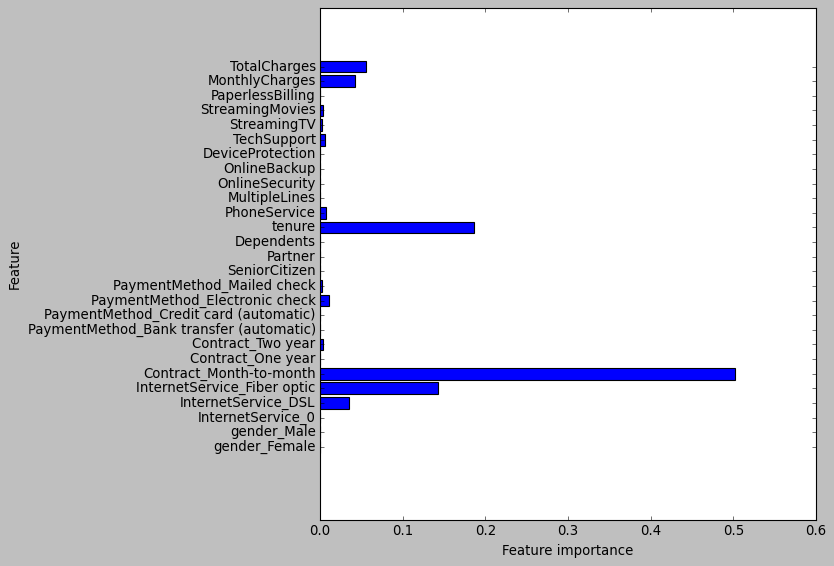

In [35]:
plot_feature_importances(tree_clf)

Observations:
- Contract Month-to-Month appears to have the highest effect on churn based on this tree
- Tenure(number of months in contract) appears to be the next most important feature for churn. 

## Test the tree
Here we will see how well the tree performs on the test set. We will grab a set of metrics to assess performance here. Metrics will include:
1. Confusion Matrix:
A confusion matrix is typically represented as a square matrix, where the rows correspond to the true classes and the columns correspond to the predicted classes. The diagonal elements of the matrix represent the correct predictions, while the off-diagonal elements represent the incorrect predictions.
- Predicted Class
- |   Positive   |   Negative   |
- `True Class  |   True Positive   |  False Negative |`
- `False Class |   False Positive  |  True Negative  |`

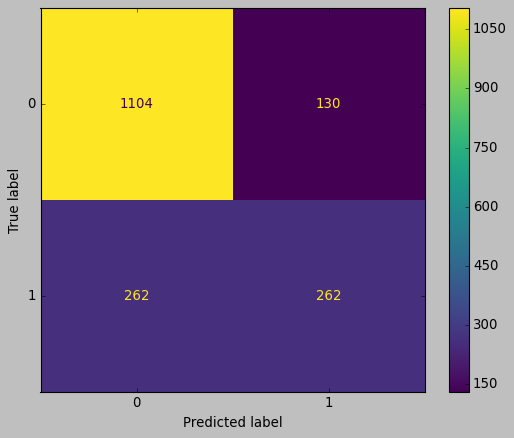

In [36]:
# Creating Test set predictions
predictions = tree_clf.predict(X_test)

#plotting confusion matrix
cm = confusion_matrix(target_test, predictions, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree_clf.classes_)
disp.plot()
plt.show()

### Metrics to be pulled from Confusion Matrix:
1. `Accuracy:` It represents the overall correctness of the model's predictions and is calculated as (TP + TN) / (TP + TN + FP + FN), where TP = True Positive, TN = True Negative, FP = False Positive, and FN = False Negative.

2. `Precision:` It measures the proportion of correctly predicted positive instances out of all instances predicted as positive. Precision is calculated as TP / (TP + FP).

3. `Recall: ` (also known as Sensitivity or True Positive Rate): It calculates the proportion of correctly predicted positive instances out of all actual positive instances. Recall is calculated as TP / (TP + FN).

4. `F1-Score:` It is the harmonic mean of precision and recall and provides a balanced measure of the two. F1-Score is calculated as 2 * (Precision * Recall) / (Precision + Recall).


**To get these metrics, we will use the classification report function.**

In [37]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1234
           1       0.67      0.50      0.57       524

    accuracy                           0.78      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.77      0.78      0.77      1758



- `Precision:` The precision for class 0 (not churn) is 0.81, indicating that 81% of instances predicted as not churned were indeed not churned. The precision for class 1 (churn) is 0.66, suggesting that 66% of instances predicted as churned were actually churned.

- `Recall:` The recall for class 0 (not churn) is 0.89, indicating that 89% of actual not churned instances were correctly identified as not churned. The recall for class 1 (churn) is 0.50, suggesting that only 50% of actual churned instances were correctly identified as churned.

- `F1-Score:` The F1-score is a harmonic mean of precision and recall, providing a single metric to evaluate the trade-off between precision and recall. The F1-score for class 0 is 0.85, and for class 1 is 0.57.

- `Accuracy:` The accuracy of 0.78 indicates that the model correctly predicted the target variable for approximately 78% of the instances in the dataset.

Comparing the classification report with the previous confusion matrix analysis, we observe similar trends:

- `Precision:` The precision values in the classification report align with the analysis of precision in the confusion matrix. Class 0 (not churn) has relatively high precision, while class 1 (churn) has a lower precision.

- `Recall:` The recall values in the classification report also align with the analysis of recall in the confusion matrix. Class 0 (not churn) has a high recall, while class 1 (churn) has a lower recall.

- `Accuracy:` The accuracy in the classification report matches the accuracy calculated from the confusion matrix. It represents the overall correctness of the model's predictions.

The classification report provides a more detailed view of the model's performance by including precision, recall, and F1-scores for each class. These metrics help assess the trade-offs between precision and recall and provide a more comprehensive evaluation of the model's effectiveness.

It's important to consider the specific requirements and context of the problem when interpreting these metrics. Depending on the application, emphasis may be placed on improving precision, recall, or achieving a balance between the two.

### Getting the testing accuracy

In [38]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, predictions) * 100))

Testing Accuracy for Decision Tree Classifier: 77.7%


78% accuracy on the test set means that the model correctly predicted the target variable for 78% of the instances in the test set. In other words, out of all the data points in the test set, approximately 78% were classified correctly by the decision tree.

## Overfitting Detection
Decision trees have a tendency to **overfit** the training data, which means they may `memorize the training set too well and fail to generalize to new, unseen data.`Analyzing the ROC curves for the training and testing sets can help identify overfitting. 

If the decision tree performs significantly better on the training set compared to the testing set (e.g., higher AUC-ROC for training), it could indicate overfitting. In such cases, you might need to consider regularization techniques like pruning or adjusting hyperparameters to reduce overfitting.

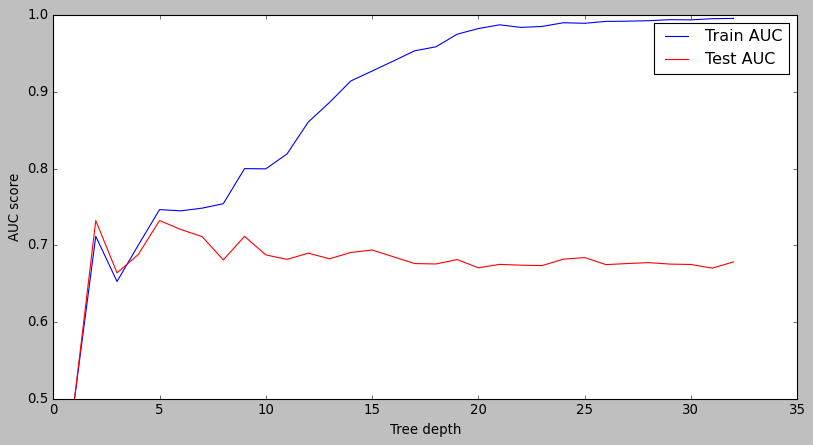

In [39]:
from sklearn import metrics
# Identify the optimal tree depth for given data
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train, target_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(target_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    target_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(target_test, target_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

Based on the roc_auc curve, it appears that the decision tree becomes most susceptible to overfitting at an approximate tree depth higher than 5.

## Bagged Trees
The first ensemble approach we'll try is a bag of trees. A bagging classifier, short for Bootstrap Aggregating classifier, is an ensemble learning method that combines multiple individual classifiers to make predictions. It is based on the idea of creating multiple subsets of the training data through bootstrapping, training a separate classifier on each subset, and then aggregating their predictions to obtain the final prediction.

Here we will instantiate a BaggingClassifier. First, initialize a DecisionTreeClassifier and set the same parameters that we did above for criterion and max_depth. Also set the n_estimators parameter for our BaggingClassifier to 20.

In [40]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

## Scoring the Bagging Classifier

Here we will check how the bagged tree performs on the training and testing set.

In [41]:
# Fit to the training data
bagged_tree.fit(X_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [42]:
# Training accuracy score
bagged_tree.score(X_train, target_train)

0.8117178612059158

In [43]:
# Test accuracy score
bagged_tree.score(X_test, target_test)

0.7866894197952219

### Analysis
Based on the provided results, the bagging classifier achieved a training accuracy score of approximately 80.8% and a test accuracy score of around 78.9%.

- Training Accuracy: The training accuracy score of 80.8% indicates that the bagging classifier performed relatively well on the training data. It correctly predicted the target variable for about 80.8% of the instances in the training set.

- Test Accuracy: The test accuracy score of 78.9% represents the performance of the bagging classifier on unseen data. It indicates that the model achieved an accuracy of approximately 78.9% on the test set, correctly predicting the target variable for that proportion of instances.

- Generalization Performance: Comparing the training and test accuracy scores, it appears that the bagging classifier's generalization performance is decent. There is a slight drop in accuracy from the training set to the test set, which is expected as the model encounters new and unseen instances during testing. However, the drop is not substantial, suggesting that the model is not severely overfitting the training data.

## Random Forest

A random forest is an ensemble learning method that combines multiple decision trees to make predictions. It is designed to improve the accuracy and robustness of predictions by introducing randomness and diversity in the learning process.

The purpose of a random forest is to address some of the limitations of individual decision trees, such as high variance and overfitting. It achieves this by leveraging the power of multiple trees and aggregating their predictions to obtain a final prediction. The random forest algorithm consists of the following key concepts:

- Ensemble of Decision Trees: A random forest consists of a collection or ensemble of decision trees. Each tree is trained independently on a random subset of the training data.

- Random Feature Subsets: In addition to using random subsets of the training data, a random forest also employs a technique called "feature bagging" or "feature subsampling." At each split in a decision tree, only a random subset of features is considered for determining the best split. This random feature selection enhances the diversity among the trees and reduces the correlation between them.

- Bootstrap Aggregation (Bagging): Each decision tree in the random forest is trained on a bootstrap sample of the training data. Bootstrap sampling involves randomly selecting instances from the training data with replacement. This process creates different subsets of the data for each tree, allowing them to have variations in the training data they observe.

- Voting or Averaging Predictions: When making predictions, each tree in the random forest independently predicts the target variable. For classification tasks, the class with the majority of votes is selected as the final prediction. For regression tasks, the predictions of all trees are averaged to obtain the final prediction.

The advantages of random forests include:

- Improved Accuracy: Random forests typically offer higher accuracy compared to individual decision trees. By combining the predictions of multiple trees, they can effectively reduce bias and variance, leading to more accurate predictions.

- Robustness: Random forests are less prone to overfitting since the randomness in feature selection and training data subsets helps to reduce the model's sensitivity to noise and outliers.

- Variable Importance: Random forests provide a measure of variable importance. By analyzing the average decrease in impurity or information gain caused by each feature, you can identify the most important features in the dataset.


Here we will initialize a random forest classifier and score it on the training and testing set.

In [44]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, target_train)

RandomForestClassifier(max_depth=5)

In [45]:
# Test accuracy score
forest.score(X_train, target_train)

0.8047023132347364

In [46]:
# Test accuracy score
forest.score(X_test, target_test)

0.7861205915813424

Results here show a similar pattern to the decision tree classifier, further exploration on the forest's model evaluation will now be assessed to see if there is a difference in the feature importances.

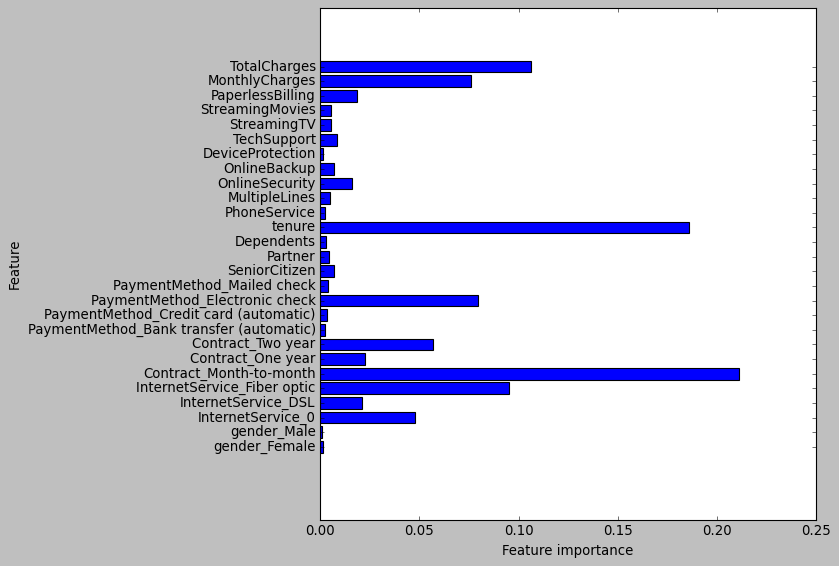

In [47]:
plot_feature_importances(forest)

### Observations

In comparison to the decision tree, we see that the random forest classifier makes better use of various features in the dataset, whereas the decision tree relied more heavily on the `contract month-to-month` variable and `tenure` for its classifications. The next step will be to implement a **pipeline** to the model. 

## XGBoost
XGBoost (eXtreme Gradient Boosting) is a powerful and widely used machine learning algorithm designed for supervised learning tasks, including both classification and regression problems. It is an implementation of the gradient boosting framework that has gained popularity due to its exceptional performance and scalability.

The purpose of XGBoost is to create an accurate and robust predictive model by combining multiple weak predictive models, typically decision trees. Here are some key purposes and advantages of using XGBoost:

1. `High Prediction Accuracy:` XGBoost is known for its exceptional accuracy and predictive power. It leverages gradient boosting techniques to iteratively train a series of weak learners (decision trees) that sequentially correct the mistakes made by the previous models. This iterative process allows XGBoost to capture complex relationships within the data, resulting in improved predictive performance.

2. `Handling Complex Data Patterns:` XGBoost can effectively handle complex data patterns, including non-linear relationships and interactions between features. The algorithm can automatically capture and model these intricate relationships through the ensemble of decision trees, making it a suitable choice for a wide range of machine learning problems.

3. `Regularization and Control over Model Complexity:` XGBoost provides various regularization techniques to control the complexity of the model and prevent overfitting. Regularization methods, such as L1 and L2 regularization, can be applied to the model's weights or the structure of the decision trees. This helps prevent the model from becoming too complex and provides a way to balance between overfitting and underfitting.

4. `Feature Importance Analysis:` XGBoost offers built-in methods to assess the importance of features in the predictive model. By examining the contribution of each feature in the ensemble of decision trees, you can gain insights into the most influential features for making predictions. This analysis aids in feature selection, understanding the underlying data, and interpreting the model's behavior.

5. `Scalability and Efficiency:` XGBoost is designed to be highly scalable and efficient, enabling it to handle large datasets and perform computations in parallel. The algorithm includes optimizations such as parallel tree construction, approximate algorithms for split finding, and efficient memory usage. These features make XGBoost suitable for both small and large-scale machine learning tasks.

6. `Flexibility and Customization:` XGBoost offers a wide range of hyperparameters that can be tuned to optimize the model's performance for specific tasks. You can adjust parameters related to the tree structure, learning rate, regularization, and more. This flexibility allows you to customize the algorithm to suit your specific needs and achieve the best results.

In [48]:
# Define the XGBoost model
model = xgb.XGBClassifier(
    n_estimators=10,  # Number of boosting iterations
    max_depth=5,  # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42
)

# Train the model
model.fit(X_train, target_train)

# Make predictions on the test set
target_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(target_test, target_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 79.24%


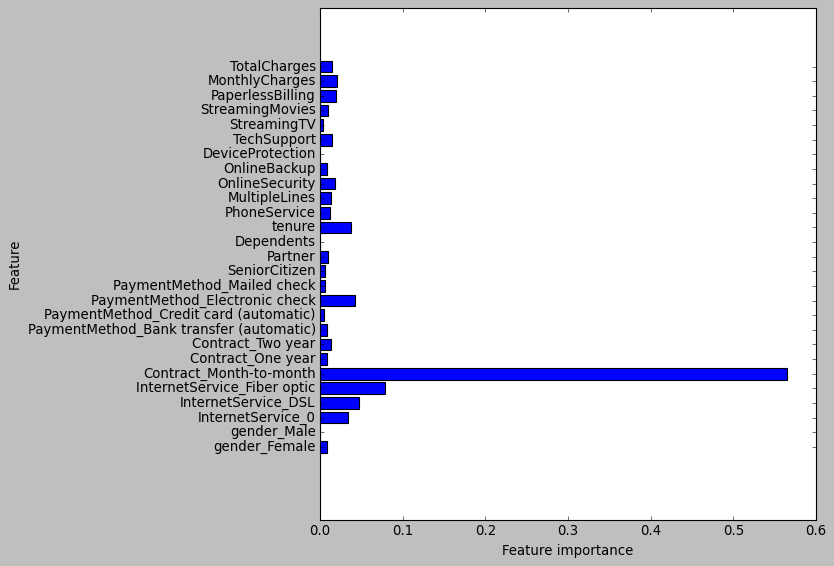

In [49]:
plot_feature_importances(model)

## Pipelines

A pipeline refers to a sequence of data processing steps that are chained together to form a cohesive workflow. It is an important concept because it allows for a systematic and automated approach to data preprocessing, feature engineering, model training, and evaluation.

The key benefits of using a pipeline in machine learning are:

1. **Code modularity and reusability**: By encapsulating different stages of the machine learning workflow into separate components, pipelines enable code modularity and reusability. Each step can be implemented as a separate module, making it easier to maintain and modify specific parts of the pipeline without affecting the entire workflow.

2. **Reproducibility**: Pipelines ensure that the same sequence of steps is consistently applied to the data, allowing for reproducibility of the results. This is especially important when sharing and collaborating on machine learning projects, as it helps others reproduce the same analysis with ease.

3. **Automation and efficiency**: Pipelines automate the process of executing multiple sequential tasks, reducing manual effort and increasing efficiency. Once a pipeline is set up, it can be applied to new datasets or updated with minimal effort, saving time and resources.

## Dummy Pipe

First, we will create a dummy pipeline to test on the dataset and see how it compares with the random forest. 

In [50]:
from sklearn.preprocessing import StandardScaler
# Create the pipeline
dummy_pipe = Pipeline([('mms', StandardScaler()),
                     ('forest', forest)])

In [51]:
# Fit to the training data
dummy_pipe.fit(X_train, target_train)

Pipeline(steps=[('mms', StandardScaler()),
                ('forest', RandomForestClassifier(max_depth=5))])

In [52]:
# Calculate the score on test data
dummy_pipe.score(X_test, target_test)

0.785551763367463

In [53]:
dummy_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'mms', 'forest', 'mms__copy', 'mms__with_mean', 'mms__with_std', 'forest__bootstrap', 'forest__ccp_alpha', 'forest__class_weight', 'forest__criterion', 'forest__max_depth', 'forest__max_features', 'forest__max_leaf_nodes', 'forest__max_samples', 'forest__min_impurity_decrease', 'forest__min_impurity_split', 'forest__min_samples_leaf', 'forest__min_samples_split', 'forest__min_weight_fraction_leaf', 'forest__n_estimators', 'forest__n_jobs', 'forest__oob_score', 'forest__random_state', 'forest__verbose', 'forest__warm_start'])

In [54]:
# Create the pipeline
dummy_pipe = Pipeline([('mms', StandardScaler()),
                     ('forest', forest)])

# Create the grid parameter
param_grid = {
    'forest__n_estimators': [10, 15, 20],
    'forest__max_depth': [None, 5, 10],
    'forest__min_samples_split': [2, 5, 10],
    'forest__min_samples_leaf': [1, 2, 4]
}

# Create the grid, with "dummy_pipe" as the estimator
grid_search = GridSearchCV(dummy_pipe, param_grid, cv=5, scoring='accuracy')

# Fit using grid search
grid_search.fit(X_train, target_train)

# Calculate the test score
grid_search.score(X_test, target_test)


0.7861205915813424

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Define the base estimators
estimators = [
    ('rf', forest),  # Random Forest classifier
    ('xgb', model)  # XGBoost classifier
]

# Define the stacking classifier pipeline
pipeline = Pipeline([
    ('stacking', StackingClassifier(estimators=estimators))
])


In [56]:
pipeline.fit(X_train, target_train)
predictions = pipeline.predict(X_test)


In [57]:
print(f'Pipeline Score: {np.round(pipeline.score(X_test, target_test) * 100, 2)}%')

Pipeline Score: 79.64%


In [58]:
# Define the base estimators
estimators = [
    ('rf', RandomForestClassifier()),  # Random Forest classifier
    ('xgb', XGBClassifier())  # XGBoost classifier
]

# Define the stacking classifier pipeline
pipeline = Pipeline([
    ('stacking', StackingClassifier(estimators=estimators))
])

# Define the parameter grid for grid search
param_grid = {
    'stacking__rf__n_estimators': [10, 15, 20],
    'stacking__rf__max_depth': [None, 5, 10],
    'stacking__xgb__n_estimators': [10, 15, 20],
    'stacking__xgb__max_depth': [3, 5, 7],
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, target_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
predictions = best_model.predict(X_test)

In [59]:
# Calculate the test score
grid_search.score(X_test, target_test)

0.7957906712172924